In [ ]:
# Random Forest Regression Algorithm for Future Employee Salary prediction

In [13]:
# Load Csv File
import pandas as pd
dataset=pd.read_csv('Position_Salaries.csv')

In [14]:
# Descriptive Head of a dataset
print("Descriptive Head of a dataset",dataset.head(4))
# Descriptive shape of a dataset
print("Descriptive shape of a dataset",dataset.shape)
# Descriptive Datatype of a dataset
print("Descriptive data type of a dataset",dataset.dtypes)

('Descriptive Head of a dataset',             Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000)
('Descriptive shape of a dataset', (10, 3))
('Descriptive data type of a dataset', Position    object
Level        int64
Salary       int64
dtype: object)


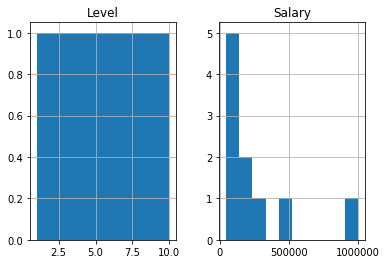

In [15]:
# Visualisation for each attribute

import matplotlib.pyplot as plt
# Histogram plot visualisation for each attribute
dataset.hist()
plt.show()

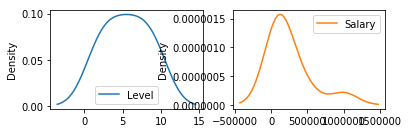

In [16]:
# Density plot Visualisation for each attribute
dataset.plot(kind='density',sharex=False,sharey=False,subplots=True,layout=(2,2))
plt.show()

In [18]:
# As per each attribute visualisation all attribute looks like gaussian distribution

In [19]:
# Split the dataset into input and output attribute
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,-1].values
print("-------------------- x Input Attribute-----------")
print(x[:4,:])
print("-------------------- y Output Attribute----------")
print(y[:4,])

-------------------- x Input Attribute-----------
[[1]
 [2]
 [3]
 [4]]
-------------------- y Output Attribute----------
[45000 50000 60000 80000]


In [20]:
# Random Forest Regression Algorithm
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=10)
randomforest.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
# Predicte accuracy of a model
y_pred=randomforest.predict(x)
print(y_pred)

[ 47500.  50500.  59000.  66000. 101000. 158000. 196000. 300000. 480000.
 800000.]


In [22]:
# Performance metrics for an algorithm
from math import sqrt
def root_mean_squared_error(actual,predicted):
    sum_error=0.0
    for i in range(len(actual)):
        yhat=predicted[i]-actual[i]
        sum_error+=(yhat**2)
    rmse=sum_error/float(len(actual))
    return sqrt(rmse)

In [23]:
# Accuracy of an algorithm
accuracy=root_mean_squared_error(x,randomforest.predict(x))
print(accuracy)

323510.159251


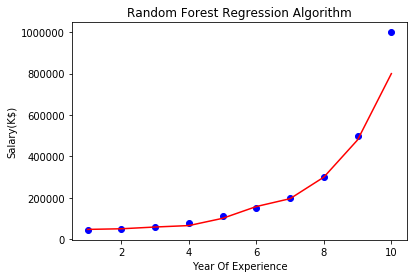

In [24]:
# Visualising Result of an algorithm
plt.scatter(x,y,color='blue')
plt.plot(x,randomforest.predict(x),color='red')
plt.title("Random Forest Regression Algorithm")
plt.xlabel("Year Of Experience")
plt.ylabel("Salary(K$)")
plt.show()

In [ ]:
# Model hav overfit with training dataset
# Both train and test set data are same so we will get this overfit issue